# Deep Learning Assignment 1
## Vishal Vijay Devadiga
## CS21BTECH11061

# Instructions

- Answer all questions. We encourage best coding practices by not penalizing (i.e. you may not get full marks if you make it difficult for us to understand. Hence, use intuitive names for the variables, and comment your code liberally. You may use the text cells in the notebook for briefly explaining the objective of a code cell.)
- It is expected that you work on these problems individually. If you have any doubts please contact the TA or the instructor no later than 2 days prior to the deadline.
- You may use built-in implementations only for the basic functions such as sqrt, log, etc. from libraries such as numpy or PyTorch. Other high-level functionalities are expected to be implemented by the students. (Individual problem statements will make this clear.)
- For plots, you may use matplotlib and generate clear plots that are complete and easy to understand.
- You are expected to submit the Python Notebooks saved as <your-roll-number>.ipynb
- If you are asked to report your observations, use the mark down text cells in the notebook.

In [1]:
# All imports
import os, sys, math, random
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Problems

## Problem 1: Perceptron Learning Algorithm
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note that you have to create such a dataset with at least 1000 data points. Plot the dataset before and after training (with the classifier).

Discuss your observations with respect to number of iterations required for perfect classification $(k)$ by varying the level of separability ($\gamma$ from the class discussions) in the dataset. (Hint: compute the average value of $k$ for each level of $\gamma$, and do this for about 5 values of $\gamma$. Observe if you can relate to the result discussed in class)

In [2]:
# Answer to question 1

# Solution

## Dataset Creation

Dataset is created by first generating a random line, and then generating random points irrespective of the line. The points are then classified based on their position with respect to the line.

## Perceptron Learning Algorithm

The perceptron learning algorithm is implemented in the following way:

1. Initialize the weights to random values
2. Add a bias term to the input, that is set to 1
3. For each point in the dataset, if the point is misclassified, update the weights based on the following formula: $w = w + \text{misclassified points * correct class}$
4. Repeat step 3 until all points are correctly classified
5. Return the weights, and the number of iterations required for perfect classification

## Gamma and Number of Iterations

What is $\gamma$? $\gamma$ is the level of separability of the dataset.

It is the distance of the points from the line. The level of separability is varied by changing the distance of the points from the line. The number of iterations required for perfect classification is then computed for each level of separability.

### Observations

The number of iterations required for perfect classification is inversely proportional to the level of separability. As the level of separability increases, the number of iterations required for perfect classification decreases.



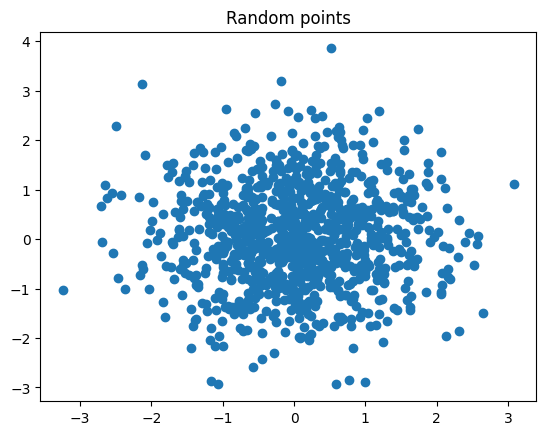

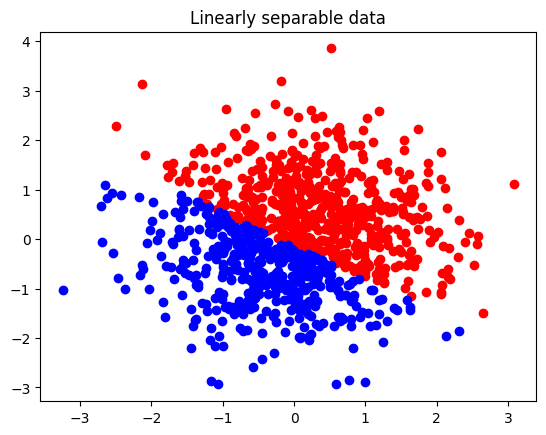

In [3]:
def generate_points(n=1000, logs=False):
    # Generate random points
    X = np.random.randn(n, 2)
    if logs:
        # Plot the points
        plt.scatter(X[:,0], X[:,1])
        plt.title('Random points')
        plt.show()
    return X

# Creating a random linearly separable dataset
# Gamma is the margin from the separating hyperplane

def generate_data(X, n=1000, gamma=0.1, use_gamma=False, logs=False):
    # Generate random line (y = mx + c)
    m = np.random.randn()
    c = np.random.randn()
    # print(c, m)

    # Sign of the points, -1 or 1, according to the line
    y = np.sign(X[:,1] - m*X[:,0] - c)

    if use_gamma:
        # To each point, add gamma in the direction of the label
        X += gamma * -y[:,np.newaxis] * np.array([m, -1]) 

    if logs:
        # print('Line:', m, c)
        # print('Points:', x)
        # print('Labels:', y)

        # Plot the points with color coding
        plt.scatter(X[y==1,0], X[y==1,1], color='r')
        plt.scatter(X[y==-1,0], X[y==-1,1], color='b')

        # Plot the line
        # plt.axline([0, c], slope=m, color='g')

        # Show the plot
        plt.title('Linearly separable data')
        plt.show()
    
    # Return the data
    return X, y

# Generate the data and plot it
X = generate_points(logs=True)

# l here is the labels
X, l = generate_data(X, logs=True)

In [4]:
# Introduce bias term

def add_bias(X):
    return np.insert(X, 0, 1, axis=1)

Initial Weights: [0.34882053 0.1109981  0.80823521]


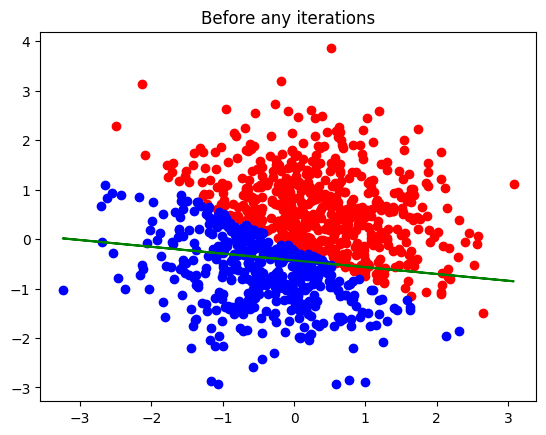

Weights: [1.34882053 6.30698634 9.17868538]
Normalized Weights: [0.12023615 0.56221544 0.81820356]
Iterations: 110


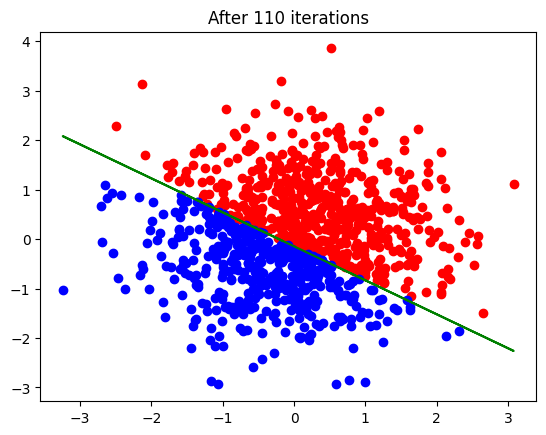

In [5]:
# Implementing the Perceptron Learning Algorithm

def perceptron(X, l, logs=False):
    
    X = add_bias(X)

    # Initialize weights
    w = np.random.rand(X.shape[1])

    if logs:
        # Print the initial weights
        print("Initial Weights:", w)

        # Plot the points with color coding
        plt.scatter(X[l==1,1], X[l==1,2], color='r')
        plt.scatter(X[l==-1,1], X[l==-1,2], color='b')

        # Plot the initial line
        plt.plot(X[:,1], -w[0]/w[2] - w[1]/w[2]*X[:,1], color='g')

        # Show the plot
        plt.title('Before any iterations')
        plt.show()

    # Iteration k
    k = 0
    
    while True:
        k += 1
        
        # Misclassified points
        misclassified = np.where(l*np.dot(X, w) <= 0)[0]

        # If no misclassified points, break
        if len(misclassified) == 0:
            break

        # Update weights
        i = np.random.choice(misclassified)
        # for i in misclassified:
        w += l[i]*X[i]

    if logs:
    # Print the weights
        print("Weights:", w)

    # Normalize the weights
    w = w / np.linalg.norm(w)

    if logs:
        # Print the normalized weights and the number of iterations
        print("Normalized Weights:", w)
        print("Iterations:", k)

        # Plot the points with color coding
        plt.scatter(X[l==1,1], X[l==1,2], color='r')
        plt.scatter(X[l==-1,1], X[l==-1,2], color='b')

        # Plot the final line
        plt.plot(X[:,1], -w[0]/w[2] - w[1]/w[2]*X[:,1], color='g')

        # Show the plot
        plt.title('After {} iterations'.format(k))
        plt.show()

    # Return the weights and the number of iterations
    return w, k

# Train the perceptron
w, k = perceptron(X, l, logs=True)

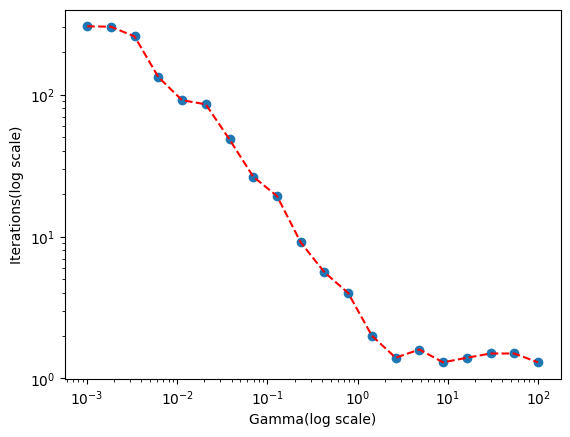

In [6]:
# 10 values of gamma
gamma_values = np.logspace(-3, 2, 20)
k_values = []

# Create 10 datasets
gX10 = [generate_points() for i in range(10)]

# Train the perceptron for each value of gamma
for gamma in gamma_values:
    k_sum = 0

    # Train the perceptron for each dataset and average the number of iterations
    for iX in gX10:
        gX, gl = generate_data(iX, gamma=gamma, use_gamma=True)
        w, k = perceptron(gX, gl)
        k_sum += k

    k = k_sum / 10
    k_values.append(k)

# Plot the number of iterations vs gamma
plt.scatter(gamma_values, k_values)
plt.plot(gamma_values, k_values, color='r', linestyle='dashed')
plt.xlabel('Gamma(log scale)')
plt.ylabel('Iterations(log scale)')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Problem 2: Gradient descent for training a linear classifier
[10 = loss formulation 4 + gradient computation 3 + update equation 3]
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset) using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our classroom discussion on the desirable properties of a loss function. You may implement the analytical way of finding gradient for it. You may implement the basic version of gradient descent update equation. Plot the dataset before and after training (with the classifier)

In [7]:
# X_temp = X
# X, l = generate_data(X_temp, gamma=0.01, use_gamma=True)
# Answer to question 2

# Solution

## Loss Function

The loss function can either be hinge loss or cross entropy loss. Hinge loss is used in SVMs, and cross entropy loss is used in logistic regression. Both of these loss functions are convex, and have a global minimum. The loss function used in this case is hinge loss.

Hinge Loss is defined as: $L = \max(0, 1 - y * (w^T * x))$

## Gradient Computation

Gradient of the hinge loss function is computed as follows:

$\nabla L = \begin{cases} -y * x & \text{if } y * (w^T * x) < 1 \\ 0 & \text{otherwise} \end{cases}$

In [8]:
# Hinge Loss

def hinge_loss(X, l, w):
    return np.maximum(0, 1 - l*np.dot(X, w))

def hinge_grad(X, l, w):
    return -np.dot(X.T, l * (l*np.dot(X, w) < 1))
    

Initial Weights: [0.48843274 0.96387993 0.83648845]


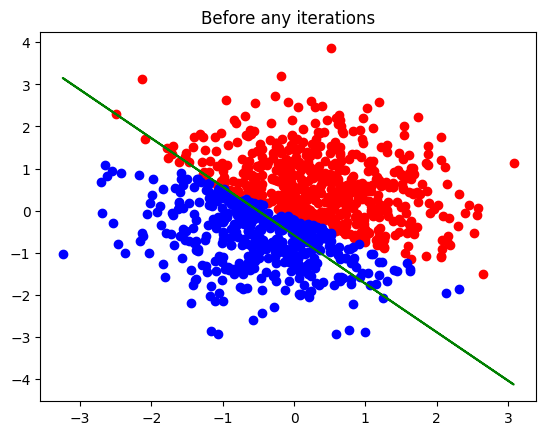

Loss:  350.5967136569095
Loss:  24248.323694631654
Loss:  2401.7239694913405
Loss:  181.82676747447977
Loss:  8.402933356555376
Loss:  7.653144879788297
Loss:  6.2909221007488245
Loss:  0.9435967666713957
Loss:  0.11329058754645305
Loss:  1.5293224034966024
Loss:  0.5613458310277952
Loss:  0.3440221031936399
Loss:  0.5766293927215214
Loss:  0.3276669180674332
Loss:  0.5919129544152475
Loss:  0.3113117329412124
Loss:  0.6071965161089736
Loss:  0.2949565478149915
Loss:  0.6224800778026998
Loss:  0.27860136268878477
Loss:  0.6377636394964401
Loss:  0.26224617756256396
Loss:  0.6530472011901662
Loss:  0.24589099243634305
Loss:  0.6683307628838923
Loss:  0.22953580731013634
Loss:  0.6836143245776326
Loss:  0.21318062218390132
Loss:  0.6988978862713587
Loss:  0.19682543705769462
Loss:  0.7141814479650848
Loss:  0.1804702519314738
Loss:  0.7294650096588109
Loss:  0.1720427012340826
Loss:  0.9716612072264139
Loss:  0.03928883403884653
Loss:  0.5894102715827993
Loss:  0.3139818379948177
Loss:  

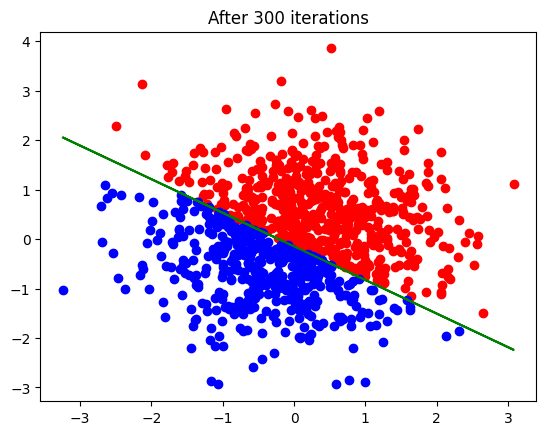

In [9]:
# Gradient Descent Algorithm

def gradient_descent(X, l, lr=0.75, epochs=1000, logs=False):

    X = add_bias(X)

    # Initialize weights
    w = np.random.rand(X.shape[1])

    if logs:
        # Print the initial weights
        print("Initial Weights:", w)

        # Plot the points with color coding
        plt.scatter(X[l==1,1], X[l==1,2], color='r')
        plt.scatter(X[l==-1,1], X[l==-1,2], color='b')

        # Plot the final line
        plt.plot(X[:,1], -w[0]/w[2] - w[1]/w[2]*X[:,1], color='g')

        # Show the plot
        plt.title('Before any iterations')
        plt.show()


    epoch = 0
    # Gradient Descent
    while epoch < epochs:
        epoch += 1
        # Calculate the loss and the gradient

        loss = hinge_loss(X ,l, w).sum()
        nabla = hinge_grad(X, l, w)

        if logs:
            # Print the loss
            print("Loss: ", loss)
        
        # If the loss is 0, break
        if np.all(loss == 0):
            break

        # Update weights
        w -= lr*nabla

    if logs:
        # Print the weights
        print("Weights:", w)

    # Normalize the weights
    w = w / np.linalg.norm(w)

    if logs:
        # Normalized Weights
        print("Normalized Weights:", w)

        # Plot the points with color coding
        plt.scatter(X[l==1,1], X[l==1,2], color='r')
        plt.scatter(X[l==-1,1], X[l==-1,2], color='b')

        # Plot the final line
        plt.plot(X[:,1], -w[0]/w[2] - w[1]/w[2]*X[:,1], color='g')

        # Show the plot
        plt.title('After {} iterations'.format(epoch))
        plt.show()


    # Return the weights
        
    return w


# Train the perceptron using gradient descent
w = gradient_descent(X, l, logs=True)

## Problem 3: MLP with a single hidden layer
[20 = dataset creation 5 + MLP definition 5 + backprop 10]
Consider a binary classification dataset that is not linearly separable in 2D (e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP) with a single hidden layer for classifying the same. You may use the loss function used in problem 2. You have to implement the backpropagation algorithm yourself.

Variation: Implement your own toy autograd engine, and use it to solve the original question.
You are welcome to discuss the approach with TAs if you like.

In [10]:
# Answer to question 3

# Solution

## Dataset Creation

The dataset from the previous problem is used for this problem.
The classes however are assigned based on the distance of the points from the origin.

Since the dataset is not linearly separable, MLP is used for classification.

## Activation Function

Sigmoid activation function is used for the output layer , and ReLU activation function is used for the hidden layer.

## Loss Function

Cross Entropy Loss is used as the loss function.

## Forward Propagation

The forward propagation is implemented as follows:

For each layer

1. $z = w * x + b$
2. $a = \text{activation}(z)$

## Backward Propagation

The backward propagation is implemented as follows:

For Layer 2

1. $\delta = pred - y$
2. $dw = \delta * a^T$
3. $db = \delta$

For Layer 1

1. $\delta = w^T * \delta * \text{activation\_derivative}(z)$
2. $dw = \delta * x^T$
3. $db = \delta$

## Gradient Descent

The weights are updated using the following formula:

$w = w - \alpha * dw$

$b = b - \alpha * db$

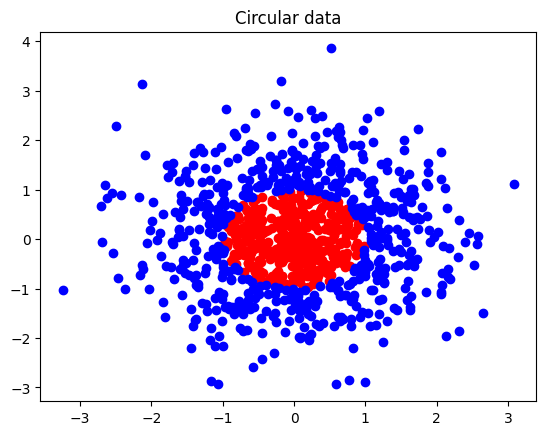

In [11]:
# Classifying the points using a circle
def generate_circle(X, r=1, logs=False):
    # Calculate the vector from the origin to each point
    unit_vec = X / np.linalg.norm(X, axis=1)[:,np.newaxis]

    # Classify the points
    norm_X = np.linalg.norm(X, axis=1)
    y = np.where(norm_X <= r, 1, -1)

    # If class is -1, increase the norm by r
    norm_X = np.where(y == -1, norm_X + r, norm_X)

    

    if logs:
        # Plot the points with color coding
        plt.scatter(X[y==1,0], X[y==1,1], color='r')
        plt.scatter(X[y==-1,0], X[y==-1,1], color='b')

        # Plot the circle
        # circle = plt.Circle((0, 0), r, color='g', fill=False)
        # plt.gca().add_artist(circle)

        # Show the plot
        plt.title('Circular data')
        plt.show()

    # Return the data
    return X, y

# Generate the data and plot it
X, y = generate_circle(X, logs=True)

In [12]:
# Define activation functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Define derivative of activation function

def sigmoid_grad(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def relu_grad(x):
    return np.where(x > 0, 1, 0)

# Define the loss function: Cross Entropy Loss

def cross_entropy_loss(y, y_hat):
    return -(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat)).mean()


In [13]:
# Initialize the weights and biases
def init_weights(X, hidden=2):
    w1 = np.random.rand(X.shape[1], hidden)
    w2 = np.random.rand(hidden, 1)
    b1 = np.random.rand(hidden)
    b2 = np.random.rand(1)

    para = {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }

    return para

# Forward propagation

def forward_propagation(X, para):
    # Retrieve the weights and biases
    w1 = para["w1"]
    w2 = para["w2"]
    b1 = para["b1"]
    b2 = para["b2"]

    # Pre-activation and activation of the first layer

    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)

    # Pre-activation and activation of the second layer
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    store = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }

    return a2, store

# Backward propagation

def backward_propagation(X, y, para, store, lr=0.1):
    # Retrieve the weights and biases
    w2 = para["w2"]

    # Retrieve the activations
    a1 = store["a1"]
    a2 = store["a2"]
    z1 = store["z1"]

    n = X.shape[0]

    # Calculate the gradients
    dz2 = a2 - y
    dw2 = (1/n)*np.dot(a1.T, dz2)
    db2 = (1/n)*np.sum(dz2)
    dz1 = (1/n)*np.dot(dz2, w2.T) * relu_grad(z1)
    dw1 = (1/n)*np.dot(X.T, dz1)
    db1 = (1/n)*np.sum(dz1, axis=0)

    grad = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }

    return grad

# Update the weights and biases using the gradients

def update_parameters(para, grad, lr=0.1):
    w1 = para["w1"]
    w2 = para["w2"]
    b1 = para["b1"]
    b2 = para["b2"]

    dw1 = grad["dw1"]
    db1 = grad["db1"]
    dw2 = grad["dw2"]
    db2 = grad["db2"]

    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2

    para = {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }

    return para


# Neural Network

def neural_network(X, y, hidden=4, epochs=1000, lr=1, logs=False):
    para = init_weights(X, hidden=hidden)
    lo = []
    ep = []
    y = np.where(y == 1, 0, 1)
    y = y.reshape(-1, 1)
    for epoch in range(epochs):
        y_hat, store = forward_propagation(X, para)
        cost = cross_entropy_loss(y, y_hat)
        grad = backward_propagation(X, y, para, store)
        para = update_parameters(para, grad, lr=lr)

        if logs:
            print("Loss: ", cost)

        lo.append(cost)
        ep.append(epoch)

        if cost == 0:
            break

    return para, lo, ep

In [14]:
# Train the MLP
para, lo, ep = neural_network(X, y, logs=True)

Loss:  0.8545761318053776
Loss:  0.7346885964142582
Loss:  0.6724410143938314
Loss:  0.6518416712389679
Loss:  0.6462520551042571
Loss:  0.6434116543224956
Loss:  0.6411803688061407
Loss:  0.6392969219335961
Loss:  0.6376817692743874
Loss:  0.6362805151179407
Loss:  0.6350505502146768
Loss:  0.6339580572705615
Loss:  0.6329761508859024
Loss:  0.6320834404954675
Loss:  0.6312628942749042
Loss:  0.6305009392395753
Loss:  0.6297867484762069
Loss:  0.6291116765993072
Loss:  0.6284688124978473
Loss:  0.6278526248377482
Loss:  0.6272586809068246
Loss:  0.626683423464503
Loss:  0.6261239934883013
Loss:  0.6255780892607546
Loss:  0.6250438542529122
Loss:  0.624519787846175
Loss:  0.6240046741832569
Loss:  0.6234975254230926
Loss:  0.622997536450188
Loss:  0.6225040487007867
Loss:  0.622016521251361
Loss:  0.6215345076967617
Loss:  0.6210576376474732
Loss:  0.6205856019146904
Loss:  0.6201181406416496
Loss:  0.6196550337902327
Loss:  0.6191960935114856
Loss:  0.6187411580238467
Loss:  0.6182900

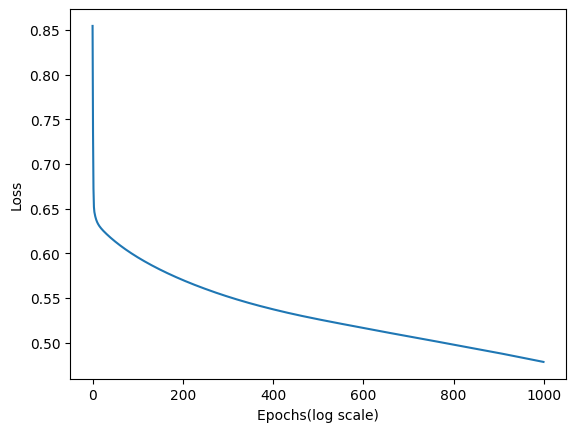

In [15]:
# Loss vs epochs
plt.plot(ep, lo)
plt.xlabel('Epochs(log scale)')
plt.ylabel('Loss')
# plt.xscale('log')
# plt.yscale('log')

plt.show()